In [1]:
#https://cmb-s4.uchicago.edu/wiki/index.php/Noise_models_and_sky_fractions_for_WAFTT#Forecasting_Details_.5Bfrom_Joel.5D

In [1]:
import os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pysm3
import pysm3.units as u
from noise import S4_LAT
from misc import camb_clfile

In [2]:
cl_len = camb_clfile("/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lensed_dls.dat")

In [13]:
noise = S4_LAT(el=50,ellmax=15000,deconv=False)
Nl_T= noise.noise_curves_T()
Nl_P= noise.noise_curves_P()
bands = noise.bands

/global/u2/l/lonappan/workspace/s4bird/cmbs4_noise/noise.py:155: RuntimeWarning: divide by zero encountered in power
  ellf = (ell/self.Tatmos_ell[:,None])**(self.Tatmos_alpha[:,None])
/global/u2/l/lonappan/workspace/s4bird/cmbs4_noise/noise.py:156: RuntimeWarning: invalid value encountered in multiply
  T_noise = self.Tatmos_cov[:,:,None] * (ellf[:,None,:] * ellf[None,:,:])**.5
/global/u2/l/lonappan/workspace/s4bird/cmbs4_noise/noise.py:159: RuntimeWarning: divide by zero encountered in power
  P_low_noise = (2*W[:,None]) * (ell / self.Patmos_ell[:,None])**self.Patmos_alpha[:,None]
/global/u2/l/lonappan/workspace/s4bird/cmbs4_noise/noise.py:161: RuntimeWarning: invalid value encountered in multiply
  (P_low_noise[:,None,:] * P_low_noise[None,:,:])**.5)


In [14]:
def inv_var(Nl):
    return 1/sum(1/a for a in Nl)

/global/homes/l/lonappan/.conda/envs/PC2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


(1.0791309791046326e-08, 10000.0)

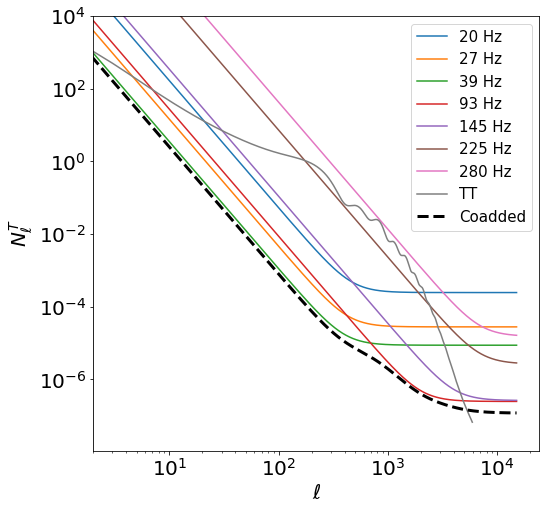

In [15]:
plt.figure(figsize=(8,8))
for idx in range(len(bands)):
        plt.loglog(noise.ell,Nl_T[idx],label=f"{int(bands[idx])} Hz")
plt.loglog(np.arange(len(cl_len['tt'])),cl_len['tt'],label='TT')
plt.loglog(noise.ell,inv_var(Nl_T),c='k',lw=3,ls='--',label="Coadded")
plt.legend(fontsize=15)
plt.xlabel("$\ell$",fontsize=20)
plt.ylabel("$N_\ell^T$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(2,None)
plt.ylim(None,1e4)

/global/homes/l/lonappan/.conda/envs/PC2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


(1.51569078018506e-10, 10.0)

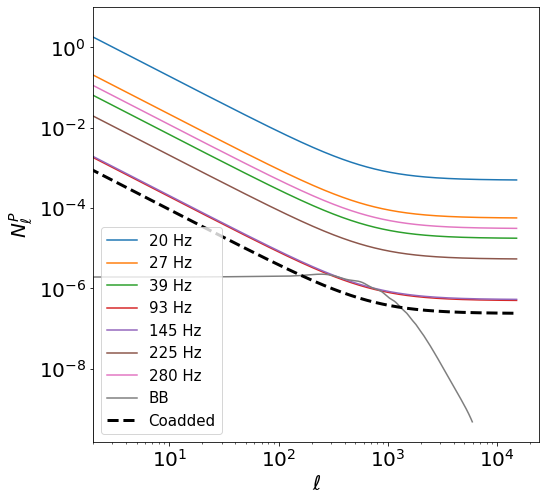

In [16]:
plt.figure(figsize=(8,8))
for idx in range(len(bands)):
    plt.loglog(noise.ell,Nl_P[idx],label=f"{int(bands[idx])} Hz")
#plt.loglog(np.arange(len(cl_len['bb'])),cl_len['ee'],label='EE')
plt.loglog(np.arange(len(cl_len['bb'])),cl_len['bb'],label='BB')
plt.loglog(noise.ell,inv_var(Nl_P),c='k',lw=3,ls='--',label="Coadded")
plt.legend(fontsize=15)
plt.xlabel("$\ell$",fontsize=20)
plt.ylabel("$N_\ell^P$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(2,None)
plt.ylim(None,1e1)